In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

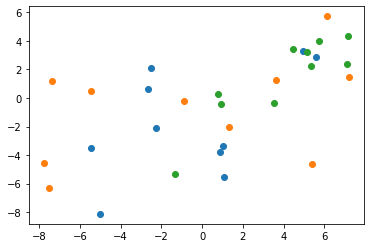

In [4]:
# Given Data
x1_w1 = np.array([-5.01,-5.43,1.08,0.86,-2.67,4.94,-2.51,-2.25,5.56,1.03])
x2_w1 = np.array([-8.12,-3.48,-5.52,-3.78,0.63,3.29,2.09,-2.13,2.86,-3.33])
plt.scatter(x1_w1,x2_w1);

x1_w2 = np.array([-0.91,1.30,-7.75,-5.47,6.14,3.6,5.37,7.18,-7.39,-7.5])
x2_w2 = np.array([-0.18,-2.06,-4.54,0.5,5.72,1.26,-4.63,1.46,1.17,-6.32])
plt.scatter(x1_w2,x2_w2);

x1_w3 = np.array([5.35,5.12,-1.34,4.48,7.11,7.17,5.75,0.77,0.9,3.52])
x2_w3 = np.array([2.26,3.22,-5.31,3.42,2.39,4.33,3.97,0.27,-0.43,-0.36])
plt.scatter(x1_w3,x2_w3);

X1 = np.stack((x1_w1,x2_w1),axis=0)
X2 = np.stack((x1_w2,x2_w2),axis=0)
X3 = np.stack((x1_w3,x2_w3),axis=0)

In [5]:
## Find mean value for each feature and write mean value vector
m1_w1 = np.mean(x1_w1) 
m2_w1 = np.mean(x2_w1)
m1 = np.array([m1_w1,m2_w1])

m1_w2 = np.mean(x1_w2) 
m2_w2 = np.mean(x2_w2)
m2 = np.array([m1_w2,m2_w2])

m1_w3 = np.mean(x1_w3) 
m2_w3 = np.mean(x2_w3)
m3 = np.array([m1_w3,m2_w3])


## Find covariance matrix for all features

# find out covariance with respect  columns 
cov_mat = np.stack((x1_w1, x2_w1), axis = 0)  
cov_mat1 = np.cov(cov_mat)
# print(cov_mat1) 
cov_mat = np.stack((x1_w2, x2_w2), axis = 0)  
cov_mat2 = np.cov(cov_mat)
# print(cov_mat2) 
cov_mat = np.stack((x1_w3, x2_w3), axis = 0)  
cov_mat3 = np.cov(cov_mat)
# print(cov_mat2) 

## Given A-prior probabilities
p_w1 = 0.5
p_w2 = 0.5
p_w3 = 0

## Find inverse of covarince matrices for future use
cov_mat1_inv = np.linalg.inv(cov_mat1)
cov_mat2_inv = np.linalg.inv(cov_mat2)
cov_mat3_inv = np.linalg.inv(cov_mat3)

## Functions to calculate Ai, Bi and Cio of discriminant function

def a_mat(cov_matinv):
    return (-0.5)*cov_matinv

def b_mat(mean_mat,cov_matinv):
    return np.dot(mean_mat.T,cov_matinv)

def CIO(mean_mat,cov_matinv,p_w):
    x = (-0.5)*np.dot(np.dot((-0.5)*mean_mat.T,cov_matinv),mean_mat)
    y = (-0.5)*np.log(np.linalg.det(cov_matinv))
    z = np.log(p_w)
    return x+y+z

## calculate Ai for all classes
a_w1 = a_mat(cov_mat1_inv)
# print(a_w1.shape)
a_w2 = a_mat(cov_mat2_inv)
a_w3 = a_mat(cov_mat3_inv)

## calculate Bi for all classes
b_w1 = b_mat(m1,cov_mat1_inv)
# print(b_w1.shape)
b_w2 = b_mat(m2,cov_mat2_inv)
b_w3 = b_mat(m3,cov_mat3_inv)

## calculate Cio for all classes
cio_w1 = CIO(m1,cov_mat1_inv,p_w1)
# print(cio_w1.shape)
cio_w2 = CIO(m2,cov_mat2_inv,p_w2)
cio_w3 = CIO(m3,cov_mat3_inv,p_w3)


<ipython-input-5-08a063517362>:49: RuntimeWarning: divide by zero encountered in log
  z = np.log(p_w)


In [7]:
def discriminator(A,B,cio,X):
    x = (-0.5)*np.dot(np.dot(X.T,A),X)
    y = np.dot(B,X)
    z = cio
    return x+y+z
x_test = np.array([[5],[-2]])
g1 = discriminator(a_w1,b_w1,cio_w1,x_test)
print(g1)
g2 = discriminator(a_w2,b_w2,cio_w2,x_test)
print(g2)
g3 = discriminator(a_w3,b_w3,cio_w3,x_test)
print(g3)

## Classifier
if g1>g2 and g1>g3:
    print('This pattern belongs to class g1')
elif g2>g1 and g2>g3:
    print('This pattern belongs to class g2')
else:
    print('This pattern belongs to class g3')

[[3.34914182]]
[[2.85704745]]
[[-inf]]
This pattern belongs to class g1
